<a href="https://colab.research.google.com/github/MartinBruchon/MartinBruchon/blob/main/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.tabular.all import *

!unzip -q Pellicule.zip
!mv ./"Camera Roll" ./inf

model = load_learner('model.pkl', cpu=False)

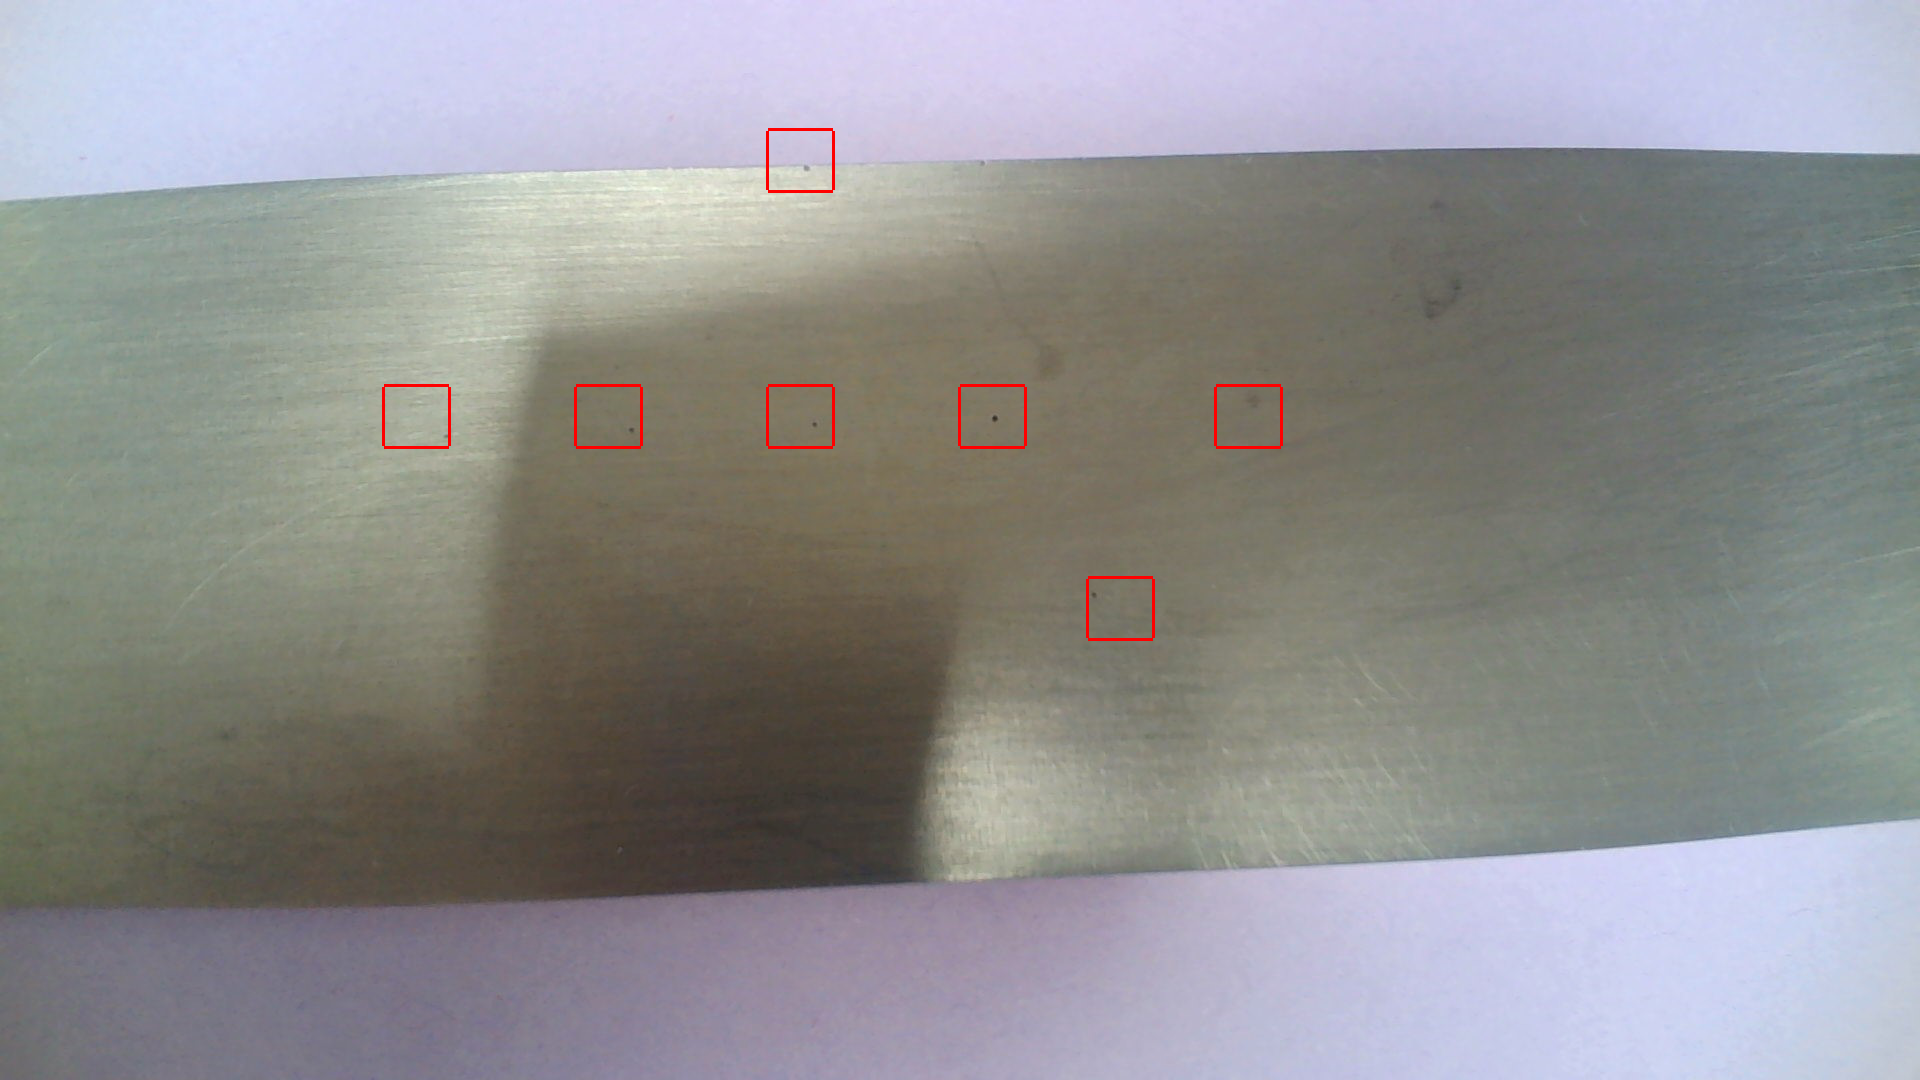

In [ ]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Charger l'image
base = Image.open('/content/WIN_20230525_11_10_43_Pro.jpg')
img1 = ImageDraw.Draw(base) 
img = np.asarray(base)

# Définir la taille des patches
patch_size = 64

# Parcourir les patches de l'image
size = 64
X = int(np.shape(img)[0]/size)
Y = int(np.shape(img)[1]/size)
for i in range(0,X):
  for j in range (0,Y):
    new = img[i*size:(i+1)*size, j*size:(j+1)*size]
    prediction = model.predict(new) 
    if prediction[2][0].item() >= 0.90:
      shape = [((j+1)*size, (i+1)*size), (j*size, i*size)]
      img1.rectangle(shape, fill=None, outline ="red", width=3)

base.show()